In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import time
%matplotlib inline

In [2]:
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

In [13]:
X = test_data[['test', 'project']]
Y = test_data['pass']

In [27]:
perceptron = Perceptron(n_iter=10000)

In [28]:
perceptron.fit(X, Y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=10000, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [29]:
print('Score: ' + str(perceptron.score(X, Y)))

Score: 1.0


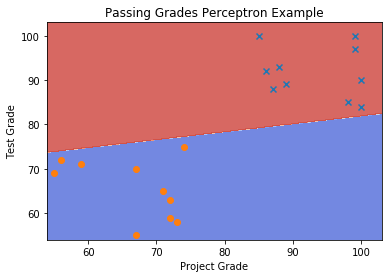

In [31]:
x_min, x_max = X.test.min() - 1, X.test.max() + 3
y_min, y_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))
Z = (perceptron.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades Perceptron Example')
plt.show()

In [32]:
artworks = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv')

In [37]:
# Select Columns.
artworks = artworks[['Artist', 'Nationality', 'Gender', 'Date', 'Department',
                    'DateAcquired', 'URL', 'ThumbnailURL', 'Height (cm)', 'Width (cm)']]

# Convert URL's to booleans.
artworks['URL'] = artworks['URL'].notnull()
artworks['ThumbnailURL'] = artworks['ThumbnailURL'].notnull()

# Drop films and some other tricky rows.
artworks = artworks[artworks['Department']!='Film']
artworks = artworks[artworks['Department']!='Media and Performance Art']
artworks = artworks[artworks['Department']!='Fluxus Collection']

# Drop missing data.
artworks = artworks.dropna()

In [38]:
artworks.dtypes

Artist           object
Nationality      object
Gender           object
Date             object
Department       object
DateAcquired     object
URL                bool
ThumbnailURL       bool
Height (cm)     float64
Width (cm)      float64
dtype: object

In [39]:
artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks['YearAcquired'] = artworks.DateAcquired.dt.year
artworks['YearAcquired'].dtype

dtype('int64')

In [40]:
# Remove multiple nationalities, genders, and artists.
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]

# Final column drops and NA drop.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

# Create dummies separately.
artists = pd.get_dummies(artworks.Artist)
nationalities = pd.get_dummies(artworks.Nationality)
dates = pd.get_dummies(artworks.Date)

# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, nationalities, dates], axis=1)

Y = artworks.Department

In [72]:
X = X[:20000]
Y = Y[:20000]

In [73]:
accuracies = []
runtimes = []
for i in range(6):
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10 * i + 1,))
    mlp.fit(X, Y)
    end = time.time()
    runtimes.append(end-start)
    accuracies.append(mlp.score(X, Y))
    print('Runtime:', end-start)

Runtime: 3.807579278945923
Runtime: 4.349517822265625
Runtime: 3.076016902923584
Runtime: 3.9114890098571777
Runtime: 3.0269711017608643
Runtime: 2.693190097808838


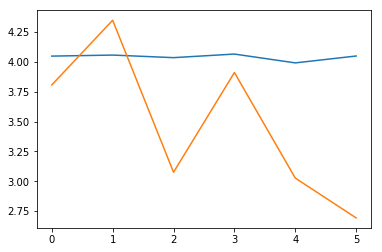

In [74]:
for i in range(len(accuracies)):
    accuracies[i] *= max(runtimes)
plt.plot(accuracies)
plt.plot(runtimes)
plt.show()

In [83]:
accuracies = []
runtimes = []
for i in range(20):
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(i*100 + 1,i * 10 + 1), random_state=32)
    mlp.fit(X, Y)
    end = time.time()
    runtimes.append(end-start)
    accuracies.append(mlp.score(X, Y))
    print('Runtime:', end-start)

Runtime: 3.101914882659912
Runtime: 3.684360980987549
Runtime: 6.755736827850342
Runtime: 8.56621503829956
Runtime: 11.800261974334717
Runtime: 13.077530860900879
Runtime: 18.531463146209717
Runtime: 26.707074880599976
Runtime: 33.854860067367554
Runtime: 31.824143886566162
Runtime: 30.035240173339844
Runtime: 77.46836876869202
Runtime: 74.17387986183167
Runtime: 55.506295919418335
Runtime: 73.33318901062012
Runtime: 87.06862592697144
Runtime: 96.98773884773254
Runtime: 101.60930466651917
Runtime: 93.28255200386047
Runtime: 122.81099772453308


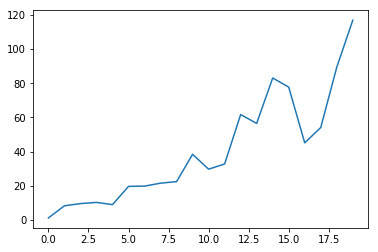

In [77]:
plt.plot(runtimes)

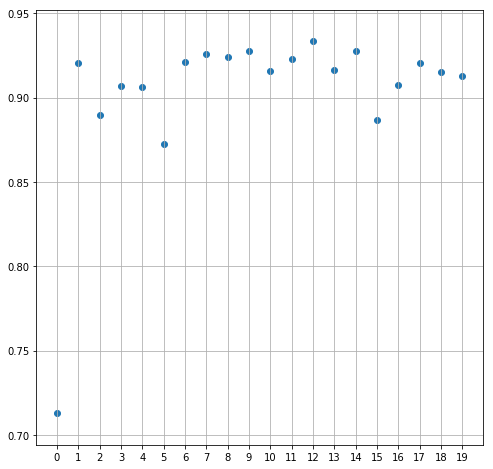

In [84]:
plt.figure(figsize=(8,8))
plt.scatter(range(20), accuracies)
plt.xticks(range(20))
plt.grid()
plt.show()
# Weird minima at i = 0, 9, 16
#(1,1)
# (901, 91)
# (1601, 161)

In [85]:
accuracies = []
runtimes = []
for i in range(10):
    start = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(i * 10 + 200,i * 10 + 50, i * 10 + 1), random_state=32)
    mlp.fit(X, Y)
    end = time.time()
    runtimes.append(end-start)
    accuracies.append(mlp.score(X, Y))
    print('Runtime:', end-start)

Runtime: 23.50534987449646
Runtime: 13.922618865966797
Runtime: 16.628026008605957
Runtime: 16.755507230758667
Runtime: 20.900566816329956
Runtime: 15.003997325897217
Runtime: 19.009287118911743
Runtime: 18.126670122146606
Runtime: 15.649374008178711
Runtime: 26.22320008277893


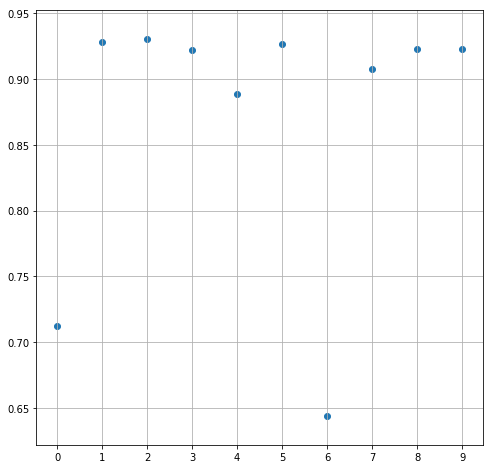

In [87]:
plt.figure(figsize=(8,8))
plt.scatter(range(10), accuracies)
plt.xticks(range(10))
plt.grid()
plt.show()

In [90]:
i = 6
mlp = MLPClassifier(hidden_layer_sizes=(i * 10 + 200,i * 10 + 50, i * 10 + 1), random_state=31)
mlp.fit(X, Y)
mlp.score(X, Y)

0.9201